In [30]:
# Import dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

Data Preparation

In [2]:
#Read crypto_data.csv into Pandas
file_path = Path("Data/crypto_data.csv")
crypto_df = pd.read_csv(file_path)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Name unnamed column
crypto_df.columns
crypto_df.columns = ['CoinAbbr', 'CoinName', 'Algorithm', 'IsTrading', 'ProofType',
       'TotalCoinsMined', 'TotalCoinSupply']
crypto_df.head()

,CoinAbbr,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Check dataframe shape before dropping rows
crypto_df.shape

(1252, 7)

In [5]:
# Check data types
crypto_df.dtypes

CoinAbbr            object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [6]:
# Discard all cryptocurrencies that are not being traded. 
Trading_Crypto_df = crypto_df[(crypto_df['IsTrading']==True)]
 
# Drop the IsTrading column from the dataframe.
Trading_Crypto_df = Trading_Crypto_df.drop(['IsTrading'], axis=1)

In [7]:
# Remove all rows that have at least one null value.
Trading_Crypto_df.dropna()

,CoinAbbr,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Filter for cryptocurrencies that have been mined (total coins mined > 0)
Mined_Crypto_df = Trading_Crypto_df.loc[Trading_Crypto_df['TotalCoinsMined'] > 0]
Mined_Crypto_df.shape

(532, 6)

In [9]:
# Delete the CoinName from the original dataframe
Mined_Crypto_df = Mined_Crypto_df.drop(['CoinName'], axis=1)

In [10]:
# Delete the CoinAbbr from the original dataframe
Mined_Crypto_df = Mined_Crypto_df.drop(['CoinAbbr'], axis=1)

In [14]:
# Convert Algorithm and ProffType column into numerical data
# Number of rows did not change, number of columns increased as a new column was created for each category
Cleaned_crypto = pd.get_dummies(Mined_Crypto_df, columns=['Algorithm', 'ProofType'], drop_first=True)

In [16]:
# Check new dataframe
Cleaned_crypto.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Standardize data for modeling 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Cleaned_crypto)

Dimensionality Reduction

In [22]:
# Initialize PCA model
# Preserve 90% of the explained variance 
pca = PCA(n_components=0.90)

# Get principal components for the data.
crypto_pca = pca.fit_transform(scaled_data)

In [23]:
# Transform PCA data to a DataFrame
crypto_pca_df = pd.DataFrame(
    data=crypto_pca)
crypto_pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335914,1.043405,-0.537409,0.001347,7.044362e-14,-8.714740e-15,-0.013578,-1.329940,-0.053106,-0.333927,...,2.934328e-15,2.434496e-15,2.487027e-15,9.790269e-16,-3.468535e-15,5.620176e-15,5.089347e-15,-6.142772e-15,9.198061e-16,-2.310364e-15
1,-0.319249,1.043547,-0.537804,0.001337,7.045326e-14,-8.731066e-15,-0.014190,-1.332705,-0.057966,-0.330612,...,2.804558e-15,2.850274e-15,2.097958e-15,8.656337e-16,-3.420764e-15,5.449385e-15,4.814896e-15,-6.192565e-15,1.233358e-15,-2.287351e-15
2,2.304716,1.669996,-0.624077,0.004420,1.091008e-13,-1.482739e-14,-0.062312,-1.554093,-0.945690,0.375087,...,4.253182e-14,-5.451376e-14,-6.953702e-15,-1.178457e-14,-2.213607e-14,5.629484e-14,-2.202371e-13,6.063621e-14,-1.153074e-14,2.791709e-14
3,-0.145455,-1.323925,0.177429,-0.001167,-2.770382e-14,3.303192e-15,0.000326,0.283548,0.252906,-0.079820,...,1.259610e-14,-5.735513e-15,-4.278538e-15,-8.689696e-15,-5.091938e-15,1.631924e-14,-4.255179e-14,1.286336e-14,-3.613047e-15,1.298285e-14
4,-0.151951,-2.044976,0.364208,-0.001636,-5.536610e-14,5.409159e-15,0.032350,0.524429,0.191031,0.074021,...,9.196044e-14,2.759134e-14,1.051899e-13,-7.155033e-15,9.718189e-15,-4.063729e-15,-1.812442e-13,-9.815111e-15,-4.360231e-14,7.167421e-14


In [24]:
# 90% of the explained variance was preserved in dimensionality reduction using PCA
# PCA reduced the number of columns from 96 to 74

In [34]:
# Run t-SNE on the principal components
tsne = TSNE(learning_rate=100)
tsne_features = tsne.fit_transform(crypto_pca_df)

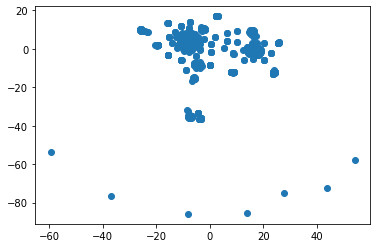

In [37]:
# Plot t-SNE results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()
# t-SNE plot shows a few distinct clusters

Cluster Analysis with k-Means

In [38]:
# Determine the inertia
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\Katli\.conda\envs\venv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,223934.406250
1,2,137738.968750
2,3,65388.035156
3,4,50753.593750
4,5,38660.136719


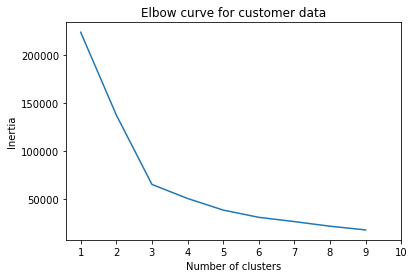

In [39]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [40]:
# Elbow of the plot is at k = 5 

Recommendation: Cryptocurrencies can be clustered together into 5 groups.